Best Parameters: {'alpha': 1}
Best Score (Negative MSE): -23.96555607592505


<Figure size 800x500 with 0 Axes>

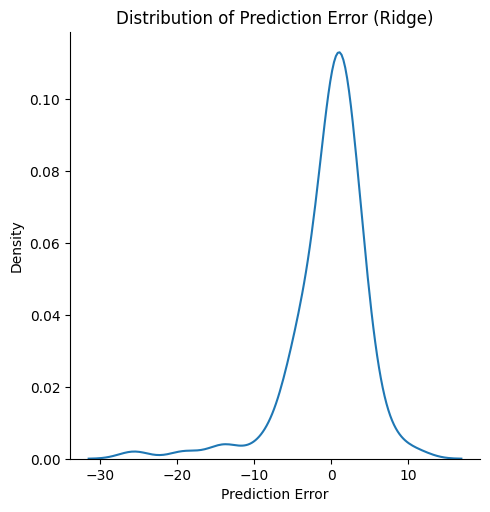

R2 Score: 0.6662221670168523


In [2]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the Boston dataset from OpenML
boston = fetch_openml(name='boston', version=1, as_frame=True)
X = boston.data
y = boston.target

# Convert columns to numeric, errors='coerce' will replace non-numeric values with NaN
X = X.apply(pd.to_numeric, errors='coerce')

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize Ridge Regressor
ridge_regressor = Ridge()

# Step 4: Define hyperparameter grid
parameters = {'alpha': [1, 5, 10, 20, 30, 50, 100]}

# Step 5: Grid Search with Cross-Validation
ridgeCV = GridSearchCV(ridge_regressor, parameters, scoring='neg_mean_squared_error', cv=5)
ridgeCV.fit(X_train, y_train)

# Step 6: Best hyperparameters and MSE
print("Best Parameters:", ridgeCV.best_params_)
print("Best Score (Negative MSE):", ridgeCV.best_score_)

# Step 7: Predictions on test set
ridge_pred = ridgeCV.predict(X_test)

# Step 8: Plot prediction errors
plt.figure(figsize=(8, 5))
sns.displot(ridge_pred - y_test, kind='kde')
plt.title("Distribution of Prediction Error (Ridge)")
plt.xlabel("Prediction Error")
plt.ylabel("Density")
plt.show()

# Step 9: R2 Score
score = r2_score(y_test, ridge_pred)
print("R2 Score:", score)

Best Parameters: {'alpha': 1}
Best Score (Negative MSE): -28.13462403557163


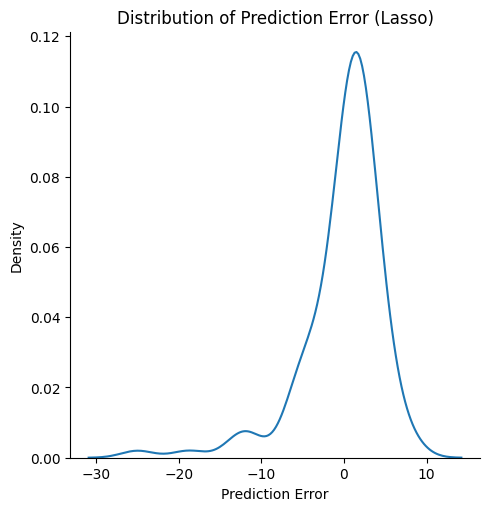

R2 Score: 0.6671453631686304


In [6]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Initialize the Lasso model (you passed the class instead of object)
lasso = Lasso()

# Step 2: Define hyperparameter grid
parameters = {'alpha': [1, 5, 10, 20, 30, 50, 100]}

# Step 3: Use GridSearchCV with the lasso object (not class name!)
lassoCV = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lassoCV.fit(X_train, y_train)  # You forgot to call .fit()

# Step 4: Best params and score
print("Best Parameters:", lassoCV.best_params_)
print("Best Score (Negative MSE):", lassoCV.best_score_)

# Step 5: Predictions
lasso_pred = lassoCV.predict(X_test)

# Step 6: Plotting error distribution
sns.displot(lasso_pred - y_test, kind='kde')  # Fixed typo: kind='kde' was correct, just confirm seaborn version supports this
plt.title("Distribution of Prediction Error (Lasso)")
plt.xlabel("Prediction Error")
plt.ylabel("Density")
plt.show()

# Step 7: R² Score
score = r2_score(y_test, lasso_pred)
print("R2 Score:", score)